Ejercicio de programación Regresión Lineal

In [38]:
# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráfivos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

# llama a maltplotlib a embeber gráficas dentro de los cuadernillos
%matplotlib inline

# uso de pandas para la lectura de archivos (dataset)
import pandas as pd
%pip install scikit-learn
from sklearn.preprocessing import LabelEncoder

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


1 Regresión lineal con una variable
Donde el dataset tiene m = 21613; n = 21
m = datos (filas)
n = columnas

Donde el dataset se basa en obtener un precio de una casa en funciona a las caracteristicas de la misma "baños, metros cuadrados por departamento, metros cuadrados por terreno, etc "

Con dichos datos se puede calcular el precio de una casa en base a los metros cuadrados del terreno (Solo se tomara esos datos de dicho dataset) de la siguiente manera:

In [39]:
#Cargado de dataset
data = pd.read_csv('./kc_house_data.csv')

In [40]:
# Lectura de datos
X = data['sqft_living'].values
y = data['price'].values

m = y.size

In [41]:
print(X)

[1180 2570  770 ... 1020 1600 1020]


In [42]:
print(y)

[221900. 538000. 180000. ... 402101. 400000. 325000.]


Trazar los datos

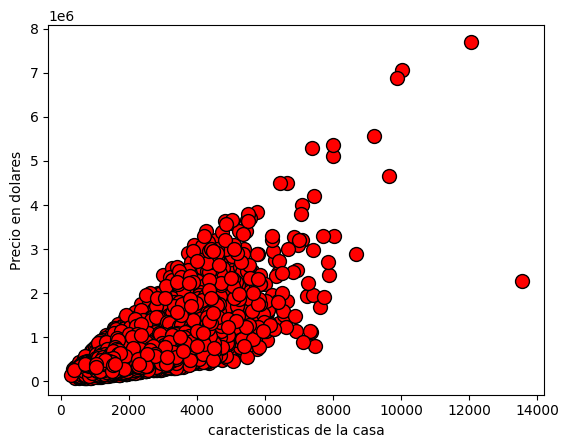

In [43]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Precio en dolares')
    pyplot.xlabel('caracteristicas de la casa')
  
plotData(X, y)

1.2 Descenso por el gradiente
1.2.1 Ecuaciones de actualización
El objetivo de la regresion lineal es minimizar la funcion de costo

J(θ)=12m∑i=1m(hθ(x(i))−y(i))2 

donde la hipotesis  hθ(x)  esta dada por el modelo lineal
hθ(x)=θTx=θ0+θ1x1 

Los parametros del modelo son los valores  θj . Estos son los valores que se ajustaran al costo minimo  J(θ) . Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion
θj=θj−α1m∑i=1m(hθ(x(i))−y(i))x(i)jactualizacion simultanea θj for all j 

Con cada paso del descenso por el gradiente, los parametros  θj  son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J( θ ).

1.2.2 Implementación

In [44]:
# Normalizar las columnas de X
def featureNormalize(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

# Normalizar X
X_norm, mu, sigma = featureNormalize(X)

In [47]:
X_norm = X_norm.reshape(-1, 1)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [48]:
print(X)

[[ 1.         -0.97983502]
 [ 1.          0.53363434]
 [ 1.         -1.42625404]
 ...
 [ 1.         -1.15404732]
 [ 1.         -0.52252773]
 [ 1.         -1.15404732]]


1.2.3 Cálculo del costo  J(θ)

In [49]:
def computeCost(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    # h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

1.2.4 Descenso por el gradiente
El costo  J(θ)  esta parametrizado por el vector  θ , no  X  y  y . Donde hay que minimizar el valor de  J(θ)  cambiando los valores del vector  θ . Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de  J(θ)  y verificar si estos decresen en cada paso.

**Vectores y matrices en `numpy`** - Importantes notas para implementación Un vector en `numpy` es un array de una diemension, por ejemplo `np.array([1, 2, 3])` es un vector. Una matriz en `numpy` is un arreglo de dos dimensiones, por ejemplo `np.array([[1, 2, 3], [4, 5, 6]])`. Sin embargo, lo siguiente todavía se considera una matriz `np.array ([[1, 2, 3]])` ya que tiene dos dimensiones, incluso si tiene una forma de 1x3 (que parece un vector).

In [57]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))

    return theta, J_history

Se inicializan los parametros  θ  con 0 y la taza de aprendizaje  α  con 0.01.

In [58]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 12500
alpha = 0.003

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))


Theta encontrada por descenso gradiente: 540088.1418, 257730.1988


Se utilizan los parametros finales para grafical la linea.

In [ ]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear'])

1.4 Visualizar  J(θ) 
Para comprender mejor la función de costo  J(θ) , se graficará la funcion de costo en 2 dimenciones con los valores de  θ0  y  θ1 .

El proposito de graficar el costo para observar como  J(θ)  varia con cambios en  θ0  y  θ1 . La función de costo  J(θ)  tiene forma de una cuenca con un minimo global. (Esto es mas facil observar en los contornos de una superficie 3D). El minimo es el punto optimo para  θ0  y  θ1 , en cada paso del descenso por el gradiente se mueve mas cerca a este punto.

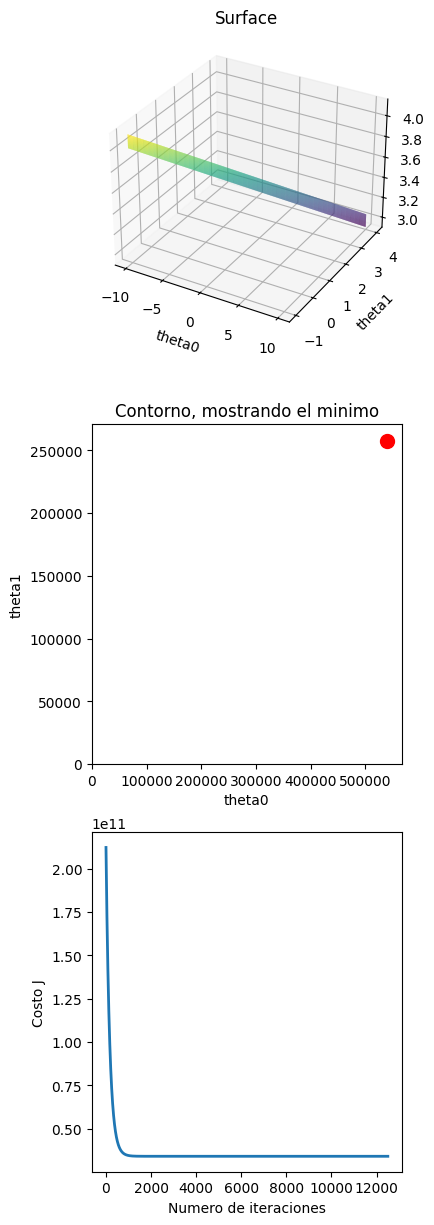

In [60]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

# Debido a la forma en que funcionan las cuadrículas en el comando surf,
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(4, 15))
ax = fig.add_subplot(311, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(312)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')


# Grafica la convergencia del costo
ax = pyplot.subplot(313)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

pass